**TP : Analyse et Prédiction de la Qualité de l'Air (SO₂)**

Ce projet vise à analyser la qualité de l’air dans une zone industrielle en utilisant l’apprentissage automatique (Machine Learning). L’objectif principal est de prédire les concentrations futures du dioxyde de soufre (SO₂) pour anticiper les pics de pollution et informer les systèmes industriels ou les citoyens via un Dashboard Java connecté au Backend Python (API REST).

# 1. Importation des packages

In [2]:
# Importer les bibliothèques nécessaires pour l'analyse des données, la visualisation, le prétraitement, et la modélisation.

# Manipulation et analyse de données
import pandas as pd
# Fournit des structures de données comme les DataFrames pour manipuler, nettoyer et analyser des données tabulaires. 
# Idéal pour le traitement de données issues de fichiers CSV, Excel ou bases de données.
import numpy as np
# Offre des structures de données efficaces pour le calcul numérique, notamment les tableaux multidimensionnels (ndarray) et des fonctions mathématiques rapides.

# Visualisation de données
import matplotlib.pyplot as plt
# Bibliothèque de base pour créer des graphiques statiques tels que des courbes, histogrammes et diagrammes en barres.
import seaborn as sns
#  Construit sur Matplotlib, elle permet de créer des visualisations statistiques plus élégantes et informatives avec moins de code.

# Apprentissage automatique (Machine Learning)
# Scikit-learn (from sklearn...) : Bibliothèque incontournable pour l'apprentissage automatique classique. 
# Elle propose des outils pour la régression, la classification, le clustering, la sélection de caractéristiques, etc.
from sklearn.model_selection import train_test_split
# Divise les données en ensembles d'entraînement et de test.
from sklearn.preprocessing import StandardScaler
# Normalise les caractéristiques pour qu'elles aient une moyenne de 0 et un écart-type de 1.
from sklearn.ensemble import RandomForestRegressor
# Modèle d'ensemble basé sur des arbres de décision pour la régression.
from sklearn.metrics import mean_squared_error, r2_score
# Fonctions pour évaluer les performances des modèles de régression.

# Apprentissage profond (Deep Learning)
import tensorflow as tf
# TensorFlow & Keras (import tensorflow as tf, from tensorflow.keras...) : TensorFlow est une bibliothèque de calcul numérique optimisée pour le Deep Learning. 
# Keras, intégré à TensorFlow, offre une interface haut niveau pour construire et entraîner des réseaux de neurones.
from tensorflow.keras.models import Sequential
# Modèle linéaire empilant les couches de manière séquentielle.
from tensorflow.keras.layers import Dense
# Couche de neurones entièrement connectée.

# Gestion des avertissements
import warnings
warnings.filterwarnings('ignore')
# Permet de contrôler l'affichage des messages d'avertissement pendant l'exécution du code, utile pour éviter des alertes non critiques.

# 2. Charger les données

## 2.1. Description de la source de données

In [3]:
# Les données proviennent d'un fichier CSV (delhi_aqi.csv) contenant des mesures horaires de la qualité de l'air à Delhi.
# Les colonnes incluent des mesures de polluants tels que CO, NO, NO2, O3, SO2, PM2.5, PM10, NH3, ainsi que la date et l'heure.

## 2.2. Description des données

In [4]:
# Charger les données dans un DataFrame Pandas.
# Afficher les premières lignes pour comprendre la structure.
# Vérifier les informations de base (types de données, valeurs manquantes, etc.).

In [5]:
data = pd.read_csv('Data/delhi_aqi.csv')
print(data.head())
print(data.info())
print(data.isnull().sum())

                  date       co     no     no2     o3    so2   pm2_5    pm10  \
0  2020-11-25 01:00:00  2616.88   2.18   70.60  13.59  38.62  364.61  411.73   
1  2020-11-25 02:00:00  3631.59  23.25   89.11   0.33  54.36  420.96  486.21   
2  2020-11-25 03:00:00  4539.49  52.75  100.08   1.11  68.67  463.68  541.95   
3  2020-11-25 04:00:00  4539.49  50.96  111.04   6.44  78.20  454.81  534.00   
4  2020-11-25 05:00:00  4379.27  42.92  117.90  17.17  87.74  448.14  529.19   

     nh3  
0  28.63  
1  41.04  
2  49.14  
3  48.13  
4  46.61  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    18776 non-null  object 
 1   co      18776 non-null  float64
 2   no      18776 non-null  float64
 3   no2     18776 non-null  float64
 4   o3      18776 non-null  float64
 5   so2     18776 non-null  float64
 6   pm2_5   18776 non-null  float64
 7   pm10   

# 3. Analyse des données (EDA)

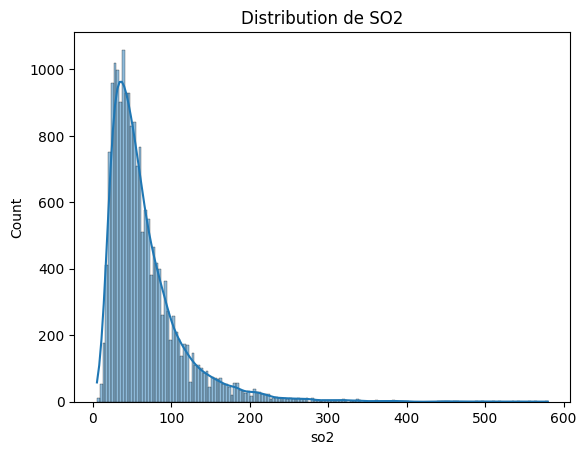

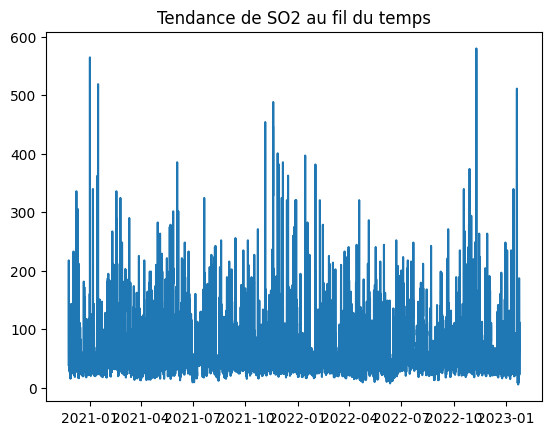

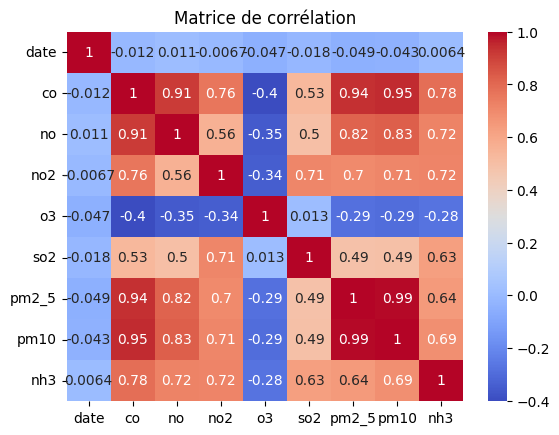

In [6]:
sns.histplot(data['so2'], kde=True)
plt.title('Distribution de SO2')
plt.show()

data['date'] = pd.to_datetime(data['date'])
plt.plot(data['date'], data['so2'])
plt.title('Tendance de SO2 au fil du temps')
plt.show()

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

# 4. Prétraitement des données

In [7]:
# Extraction des caractéristiques temporelles

data['hour'] = data['date'].dt.hour
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month

# Normalisation des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop(columns=['date']))

# 5. Division de données (Train et Test)

In [8]:
# Normaliser les données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop(columns=['date']))

# Convertir en DataFrame avec les noms de colonnes
column_names = data.drop(columns=['date']).columns
scaled_data_df = pd.DataFrame(scaled_data, columns=column_names)

# Diviser les données en ensembles d'entraînement et de test
X = scaled_data_df.drop(columns=['so2'])  # Features
y = scaled_data_df['so2']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Construire le modele

## 6.1. Construire le modele Machine Learning

In [9]:
# Nous allons utiliser un modèle de régression (Random Forest), Entraîner le modèle sur les données d'entraînement.
# Puis evaluer les performances sur les données de test.

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print('R2 Score:', r2_score(y_test, y_pred_rf))

RMSE: 0.2821658343560978
R2 Score: 0.9178126185898792


## 6.2. Construire le modele Deep Learning

In [10]:
# Ici nous allons créer un modèle de réseau de neurones avec TensorFlow/Keras.
# Entraîner le modèle sur les données d'entraînement.
# Évaluer les performances sur les données de test

model_dl = Sequential()
model_dl.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_dl.add(Dense(32, activation='relu'))
model_dl.add(Dense(1, activation='linear'))
model_dl.compile(optimizer='adam', loss='mse')
model_dl.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
y_pred_dl = model_dl.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_dl)))
print('R2 Score:', r2_score(y_test, y_pred_dl))

Epoch 1/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3913 - val_loss: 0.1442
Epoch 2/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1232 - val_loss: 0.1062
Epoch 3/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1000 - val_loss: 0.0972
Epoch 4/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0977 - val_loss: 0.0925
Epoch 5/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0827 - val_loss: 0.0911
Epoch 6/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0825 - val_loss: 0.0998
Epoch 7/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0789 - val_loss: 0.0832
Epoch 8/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0775 - val_loss: 0.0861
Epoch 9/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0728 - val_loss: 0.0757
Epoch 10/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0731 - val_loss: 0.0767
Epoch 11/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0689 - val_loss: 0.0902
Epoch 12/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

# 7. Visualiser l'evolution de l'entrainement du réseau de neurone

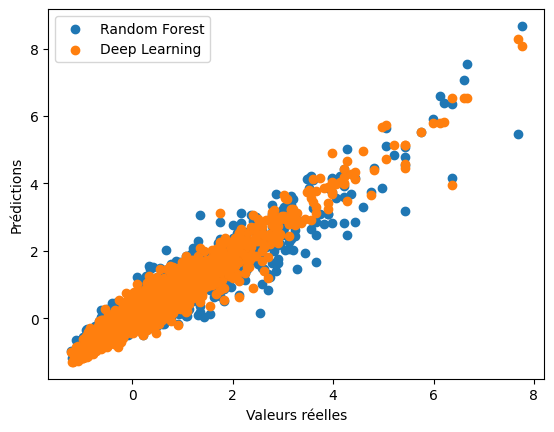

In [11]:
# Visualiser les prédictions par rapport aux valeurs réelles

plt.scatter(y_test, y_pred_rf, label='Random Forest')
plt.scatter(y_test, y_pred_dl, label='Deep Learning')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.legend()
plt.show()

# 8. Evaluer le modele

Epoch 1/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0488 - mae: 0.1557 - val_loss: 0.0648 - val_mae: 0.1723
Epoch 2/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0523 - mae: 0.1600 - val_loss: 0.0594 - val_mae: 0.1675
Epoch 3/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0522 - mae: 0.1607 - val_loss: 0.0599 - val_mae: 0.1679
Epoch 4/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0476 - mae: 0.1526 - val_loss: 0.0704 - val_mae: 0.1933
Epoch 5/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0474 - mae: 0.1552 - val_loss: 0.0589 - val_mae: 0.1650
Epoch 6/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0455 - mae: 0.1509 - val_loss: 0.0608 - val_mae: 0.1687
Epoch 7/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0478 - mae: 0.1529 - val_loss: 0.0598 - val_mae: 0.1660
Epoch 8/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0487 - mae: 0.1550 - val_loss: 0.0618 - val_mae: 0.1656
Epoch 9/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - lo

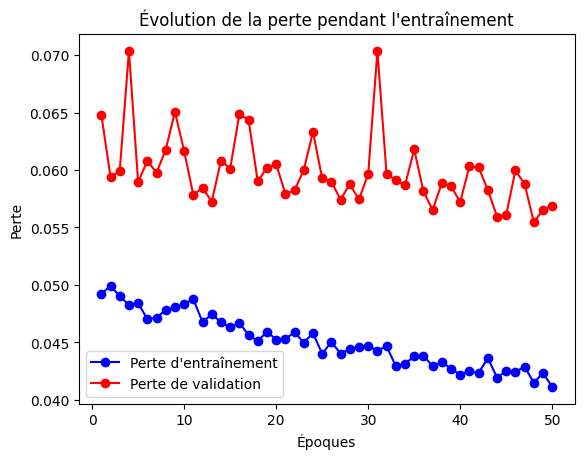

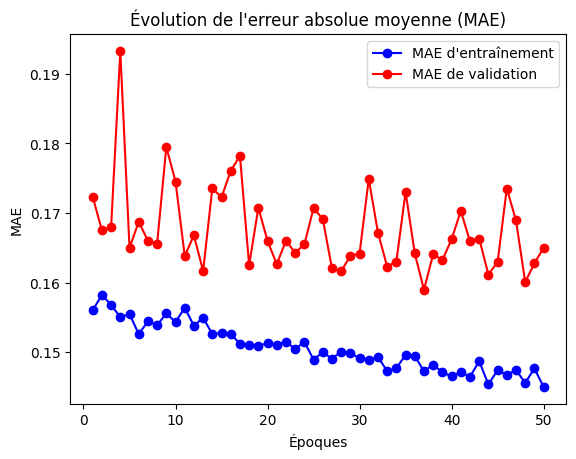

In [12]:
# Comparons maintenant les performances des modèles (Machine Learning vs Deep Learning).
# Analyser les erreurs RMSE.

# Compiler le modèle avec une métrique supplémentaire
model_dl.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entraîner le modèle et capturer l'historique
history = model_dl.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Visualiser la perte
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo-', label='Perte d\'entraînement')
plt.plot(epochs, val_loss, 'ro-', label='Perte de validation')
plt.title('Évolution de la perte pendant l\'entraînement')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()

# Visualiser l'erreur absolue moyenne (MAE)
train_mae = history.history['mae']
val_mae = history.history['val_mae']

plt.plot(epochs, train_mae, 'bo-', label='MAE d\'entraînement')
plt.plot(epochs, val_mae, 'ro-', label='MAE de validation')
plt.title('Évolution de l\'erreur absolue moyenne (MAE)')
plt.xlabel('Époques')
plt.ylabel('MAE')
plt.legend()
plt.show()

